# Exercice 1


In [1]:
#question 1
def RAND48(seed):
    a = 25214903917
    c = 11
    m = 2**48
    res = (((a*seed)+c)%m)
    return res

In [2]:
#question 2
global seedGlobale
seedGlobale = -1

def initRAND48(s):
    seedGlobale = s

In [3]:
#question 3

global genere
genere = []

def bit_suivant():
    global genere
    global seedGlobale
    if len(genere) > 0:
        res = genere[-1]
        genere.pop()
        return res
    seedGlobale = RAND48(seedGlobale) 
    genere = list(bin(seedGlobale))[2:]
    while(len(genere) < 48):
        genere.insert(0,0)
    return bit_suivant()

bit_suivant()

'0'

In [4]:
#question 4
def gen_uniforme(bMax):
    binBMax = bin(bMax)[2:]
    res = 0
    for i in range(len(binBMax)):
        res = res*10 + int(bit_suivant())
    if int(binBMax,2) < int(str(res),2):
        return gen_uniforme(bMax)
    return int(str(res),2)
    

In [5]:
#Vérification de l'uniformité

N = 5
ite = 1000000

listUni = [0 for i in range (N+1)]

for _ in range (ite):
    number = gen_uniforme(N)
    #print("Gen "+str(number))
    listUni[number] = listUni[number] + 1

listUni = [i/ite for i in listUni]
print("Proportion des tirages des i allant de 0 à "+str(N)+" :")
print(listUni)

Proportion des tirages des i allant de 0 à 5 :
[0.166691, 0.166807, 0.166571, 0.166536, 0.166539, 0.166856]


---

# Exercice 2


### Question 2.1

In [6]:
#question 1
class Node:

    def __init__(self, data):

        self.left = None
        self.right = None
        self.data = data
        self.father = None

        
# findval method to compare the value with nodes
    def contient(self, lkpval):
        if lkpval == self.data:
            return True
        b1 = False
        b2 = False
        if self.left:
            b1 = self.left.contient(lkpval)
        if (not b1) and self.right:
            b2 = self.right.contient(lkpval)
        return b1 or b2 



### Question 2.2

In [7]:
#question 2
def arbre2str(abr):
    res = "("
    if abr.left:
        res += arbre2str(abr.left)
    if abr.right:
        res += arbre2str(abr.right)
    res += ")"
    return res

---

# Exercice 3

### Question 3.1

In [8]:
#question 1
from random import *

def gen_remy(n):
    if n <= 0:
        return "n invalide"
    root = Node(1)
    listeNodes = [root]
    for i in range(1,n):
        current = choice(listeNodes)
        newG = None
        newD = None
        if random() < 0.5:
            newG = current
            newD = Node(i+1)
        else:
            newD = current
            newG = Node(i+1)
        listeNodes.remove(current)
        newC = Node(None)
        newC.father = current.father
        newC.left = newG
        newC.right = newD
        if current.father == None:
            pass
        elif current.father.left == current:
            current.father.left = newC
        else:
            current.father.right = newC
        newG.father = newC
        newD.father = newC
        listeNodes.append(newG)
        listeNodes.append(newC)
        listeNodes.append(newD)
    root0 = filter(lambda x : x.father == None,listeNodes)
    return next(root0)
    

### Question 3.2

In [9]:
arbre2str(gen_remy(10))

'(()(()((()(()(()((()(()()))()))))())))'

In [10]:
#arbre2str(gen_remy(30))

In [11]:
#arbre2str(gen_remy(50))

In [12]:
#arbre2str(gen_remy(100))

In [13]:
#arbre2str(gen_remy(1000))

In [14]:
#arbre2str(gen_remy(10000))

### Représentation graphique des arbres générés

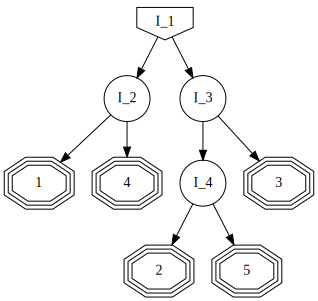

In [15]:
from graphviz import Digraph
dot = Digraph()

N = 5
global cpt
cpt = 2

def generateDigraph(tree, graph):
    global cpt
    
    if (tree == None):
        return
    
    root = str(tree.data)
    
    right = tree.right
    left = tree.left
    
    if (right != None):
        if (right.data == None):
            right.data = "I_"+str(cpt)
            cpt+=1

        leaf = True if (right.left == None and right.right == None) else False
        graph.node(str(right.data), shape='tripleoctagon' if leaf else 'circle')
        graph.edge(root, str(right.data))
        generateDigraph(tree.right, graph)
    
    if (left != None):
        if (left.data == None):
            left.data = "I_"+str(cpt)
            cpt+=1
        
        leaf = True if (left.left == None and left.right == None) else False
        graph.node(str(left.data), shape='tripleoctagon' if leaf else 'circle')
        graph.edge(root, str(left.data))
        generateDigraph(tree.left, graph)

testTree = gen_remy(N)
testTree.data = "I_1"
dot.node(testTree.data, shape='invhouse')
generateDigraph(testTree, dot)

dot